<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session1/EVA_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

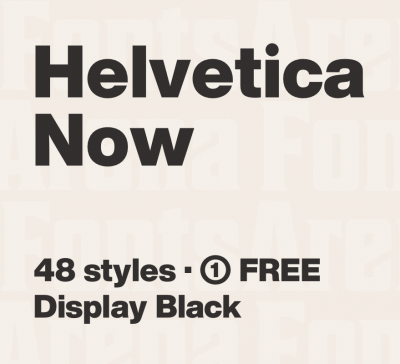

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

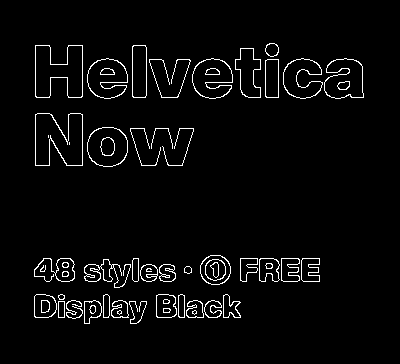

In [0]:
cv2_imshow(edges)

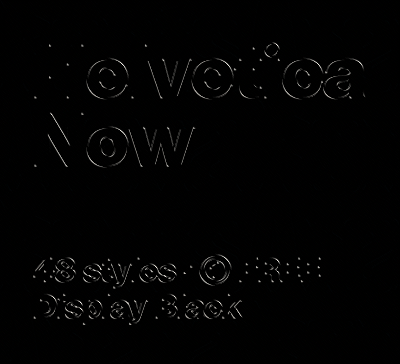

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

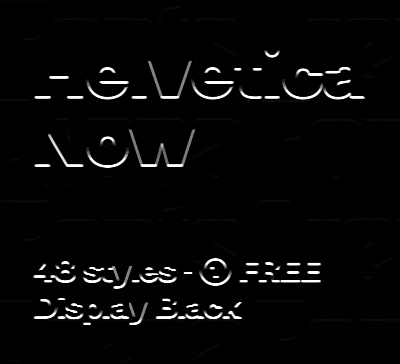

In [0]:
#Horizontal edge detection
#Note: My interpretations after reading articles on Edge detections on images, kindly correct if any of my understanding is wrong
#Edges are points of discontinuities interms of image brightness. As sudden discontinuties are the characteristics of natural images.
# So edges both vertical & horizontal comprises of gradient (changes in brightness) as it is grayscale so 0-255 and 1 channel only convolution 
#procedure
#Read image
# Gradient means we examine two coloumns to look for a horizonatl line (i,e take a 8*8 image check the first row 
# if the pixel values are [255,255,255,255,0,0,0,0] the image would have been [-----    ])which is what we want to detect
# similarly if we check for difference of pixels in two rows we get a vertical edge detector 
# 3X3 matrix provides symmetry, but this matrix will give gradient transition from right to left  so if the edge is low to bright pixel
#it gives a dark shade there
kernel = np.float32([[-1,-1,-1],[0,0,-0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

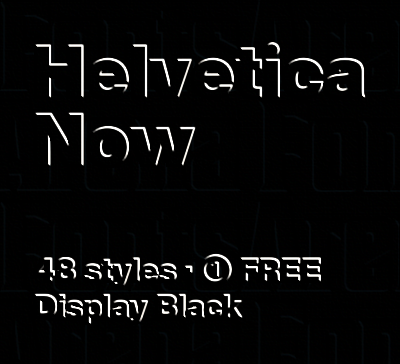

In [0]:
#Angle 
#Note: My interpretations after reading articles on Edge detections on images, kindly correct if any of my understanding is wrong
# Gradient means we examine two coloumns to look for a horizonatl line (i,e take a 8*8 image check the first row 
# if the pixel values are [255,255,255,255,0,0,0,0] the image would have been [-----    ])which is what we want to detect
# similarly if we check for difference of pixels at a angle i.e by makinga kernel/filter which has variations at an angle 
#we can get angle detectors 
kernel = np.float32([[0,1,1],[-1,0,1],[-1,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

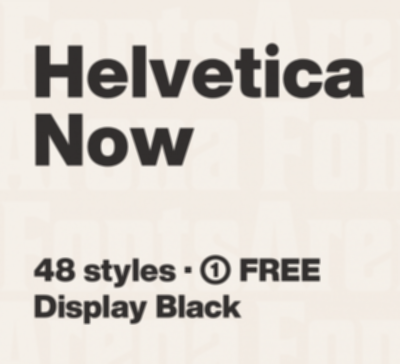

In [0]:
#Blur Kernel
#Note: My interpretations after reading articles on Edge detections on images, kindly correct if any of my understanding is wrong
# blur means the value of the individual pixel and the corresponding pixel is reduced and averaged along the entire rows and coloumn
# which will reduce the image feature 
# Also the blur kernel sum of the values should be 1 otherwise the image will be come darker/brighter . 
kernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


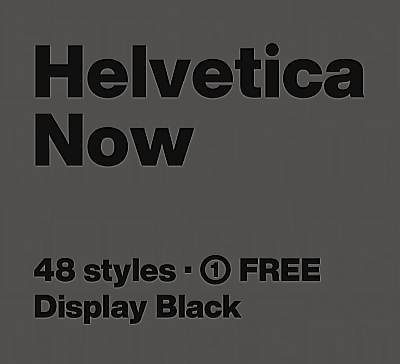

In [0]:
#Sharpen Kernel
#Note: My interpretations after reading articles on Edge detections on images, kindly correct if any of my understanding is wrong
# sharpen means the increase the gradient between bright and dark pixels in a image 
# Kind of puuting more weights on loud features ( Variation of high pass filter in a image) 
# The present image has lot wide gradient difference areas which results in the more darker version of the image
kernel = np.float32([[-1/9,-1/9,-1/9],[-1/9,1,-1/9],[-1/9,1/9,-1/9]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

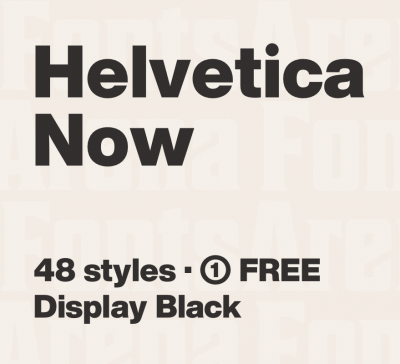

In [0]:
#Identity  Kernel
#Note: My interpretations after reading articles on Edge detections on images, kindly correct if any of my understanding is wrong
# Just do nothing on the image
#as the stride is 1 so every pixel aggregate is calculated as it is and not based on its neighbours so does nothing on the image
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)